In [1]:

import edward as ed
import edward.models as edm
import tensorflow as tf
import numpy as np
import pymisca.numpy_extra as pynp
# import tensor
import pymisca.util as pyutil
import pymisca.vis_util as pyvis
import pymisca.tensorflow_extra as pytf;reload(pytf)
edm = pytf.edm
# pytf.sphereUniformDiag()
# edm.sphereUniformDiag
i = 0

/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network


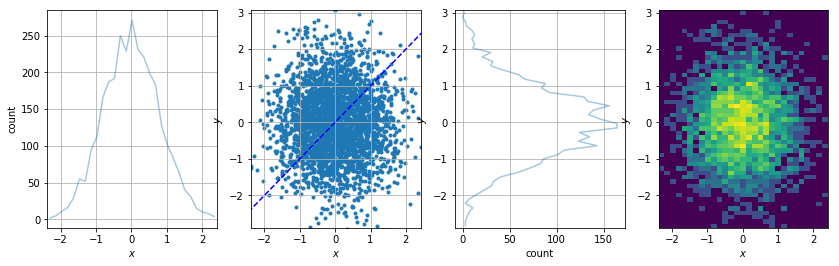

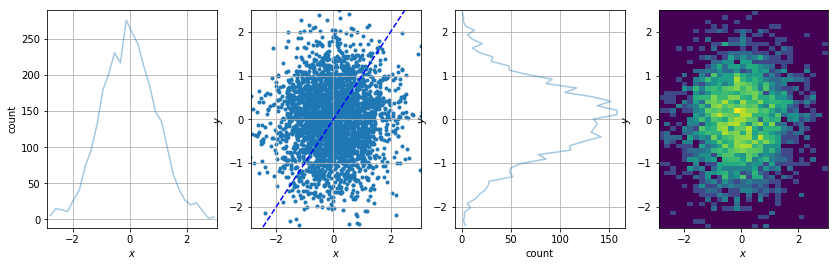

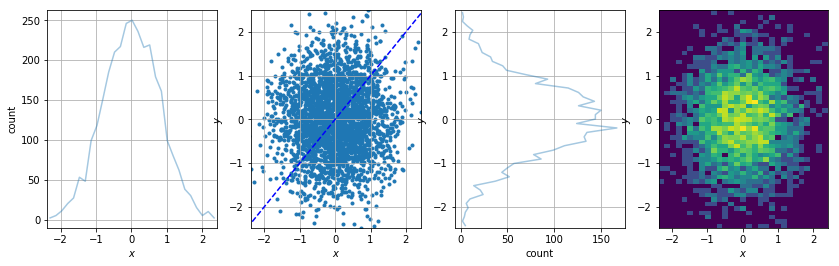

In [2]:
N = 5000
D = 6
K = scale = np.random.random(size=D)*3

x = (np.random.random(size=(D,1)) -0.5) * 8
K = np.diag(K) + x.T * x
K  = np.linalg.inv(K)
scale = K
# scale = (1., 2.5)

X1 = np.random.multivariate_normal((0,)*D, scale,size=5000)
#     X1 = X1/np.linalg.norm(X1,axis=1,keepdims=1)
X1 = X1.astype(np.float32)

pyvis.qc_2var(X1.T[0],X1.T[1])
pyvis.qc_2var(X1.T[1],X1.T[2])
pyvis.qc_2var(X1.T[0],X1.T[2])

In [3]:
mi = 0

In [4]:
# X1lp = t.log_prob(X1).eval()

data = X1

N = len(data)

# scale = edm.Uniform(sample_shape=(D,D))
# scale = edm.WishartFull(scale=np.eye(D,dtype=  np.float32),df=100,)
# concentration = tf.log( tf.constant([D/2.]) - 1. )
# rate = edm.Uniform(sample_shape=(1,))


# name = self.name

mi+=1
name = 'test%d'%mi
try:
    tf.get_variable(name+'/test',[1])
    reuse = None
except:
    reuse = True
print (reuse)


em_key = [
    'scale_diag',
    'scale_perturb_factor',
    'concentration',
    'rate',
]

prior = pyutil.util_obj(em_key=em_key)

post = pyutil.util_obj(em_key=em_key)


emDist = edm.sphereUniformLRP
with tf.variable_scope(name, reuse=reuse):

#     self.q_pi = ed.models.PointMass(
#         tf.nn.softmax(
#             tf.get_variable("q_pi", [K])
#         )
#     )

#     self.q_mu = ed.models.PointMass(
#         tf.get_variable("q_mu", [K,D])
#     )
    
    span = [-1E5,1E5]
    
    prior.scale_diag = edm.Uniform(*span,sample_shape=(D))
    
    prior.scale_perturb_factor = edm.Uniform(*span,sample_shape=(D,1))
    
    prior.concentration = edm.Uniform(*span,sample_shape=(1,))
    
    prior.rate = edm.Uniform(*span,sample_shape=(1,))
    
    
    priorEMD = emDist(sample_shape=N,**pyutil.name2dict(prior,
                                                  prior.em_key))



    
    post.scale_diag  = edm.PointMass(
        tf.nn.softplus(
            tf.get_variable('q_scale_diag',shape=[D])
                      ),
    )
    post.scale_perturb_factor = ed.models.PointMass(
        (
            tf.get_variable("q_scale_perturb_factor", [D,1])
        )
    )

    post.concentration  = edm.PointMass(
        tf.nn.softplus(
            tf.get_variable('q_concentration',shape=[1])
        )
    )
    
    post.rate  = edm.PointMass(
        tf.nn.softplus(
        tf.get_variable('q_rate',shape=[1])
        )
    )

    postEMD = emDist(sample_shape=N,**pyutil.name2dict(post, 
                                                 post.em_key))

    
names = em_key
paramDict = {getattr(prior,name):getattr(post,name) for name in names}

inf = ed.MAP(paramDict,{postEMD:data})


print np.diag(K)

None
(6, 6) (5000, 6)


ValueError: Shape must be rank 2 but is rank 3 for 'test1/sphereUniformLRP/sample/LinearOperatorUDVHUpdate/solve/LinearOperatorUDVHUpdate/solve/MatMul' (op: 'MatMul') with input shapes: [6,1], [5000,6,1].

In [ ]:
tf.contrib.linalg.LinearOperator.solvevec??

In [ ]:
tf.matrix

In [ ]:
lst = 50,100,200,1000

n_iter = 50
# for n_iter in lst:
n_iter = 0
# i = 5
for _ in range(1):
    i+=1;
    sess = tf.InteractiveSession()
    with sess.as_default():
        tf.global_variables_initializer().run()
#         np.random.seed(i)
#         tf.set_random_seed(i)
#         print (self.scale_diag.eval())
    
        inf = ed.MAP(
            paramDict,
            {
                postEMD:data, 
            })


        inf.run(n_iter=0)
        self = post
#         for _ in range(10):    
        for _ in range(3):    
            sigsq = self.scale_diag.eval()
            sigsq = np.diag(self.scale_diag.eval()) + self.scale_perturb_factor.eval().T * self.scale_perturb_factor.eval()
            sigsq = np.dot(sigsq,sigsq)
#             print (_, sigsq[0]/sigsq[1],sigsq)
            n_iter += 200
            [x.run() for x in inf.reset]
            inf.run(n_iter=n_iter)
            for mat in [sigsq, np.linalg.inv(K)]:
                print (pyutil.mat2str(np.diag(pyutil.detNorm(mat)),decimal=3))
            print (np.log1p(np.exp([self.rate.eval()[0],
                                    self.concentration.eval()[0]])[::-1]),
                   data.shape)
#             print (np.diag(pyutil.detNorm(sigsq)).tolist());print(np.diag(pyutil.detNorm(K))**-1)
#         break

In [31]:
import models; reload(models); from models import *
import pymisca.tensorflow_extra as pytf; reload(pytf)
edm = pytf.edm

class SunifLRP_sVIMAP(BaseModel):
#     self.emDist = edm.MultivariateNormalDiagPlusLowRank    
#     emDist = edm.MultivariateNormalDiagPlusLowRank    
    emDist = edm.sphereUniformLRP
    def __init__(self,D=None,K=20,
                 *args,**kwargs):
        super(SunifLRP_VIMAP,self).__init__(*args,**kwargs)
        self.K = K
        self.D = D
        self.initialised = False
        if D is not None:
            self.init_model(D=D)   
        
            
    def init_model(self,D=None,K = None,alpha = 1.0):
        self.D = D = self.D if D is None else D
        assert D is not None
        self.K = K = self.K if K is None else K
        assert K is not None
#         print (K)
        
        uspan = [-1E5,1E5]
        name = self.name
        try:
            tf.get_variable(name+'/test',[1])
            reuse = None
        except:
            reuse = True
        print reuse
        with tf.variable_scope(name, reuse=reuse):
            
            ##### Prior
            prior.mu = edm.Normal(tf.zeros(D), tf.ones(D), sample_shape=K)            
            prior.scale_diag =  edm.Uniform(*uspan,sample_shape=(K,D))
            prior.scale_perturb_factor =  edm.Uniform(*uspan,sample_shape=(K,D,1))   
#             prio
#             scale_perturb_factor = edm.Normal(
#                     loc=tf.zeros(1),
#                     scale=tf.ones(1),
#                     sample_shape=(K,D)
#                 )
#             prior.weight = edm.Dirichlet(tf.ones(K))
            prior.weight = pi = edm.Dirichlet( float(alpha)/K * tf.ones(K) )
        
            ##### Posterior
            post.weight = ed.models.PointMass(
                tf.nn.softmax(
                    tf.get_variable("q_pi", [K])
                )
            )
            post.mu = ed.models.PointMass(
                tf.get_variable("q_mu", [K,D])
            )
            
            post.scale_diag  = edm.PointMass(
                tf.nn.softplus(
                    tf.get_variable('q_scale_diag',shape=[K,D])
                              ),
            )
            
            post.scale_perturb_factor = ed.models.PointMass(
                (
                    tf.get_variable("q_scale_perturb_factor", [K,D,1])
                )
            )
            
        self.prior = prior
        self.post = post
        
        ##### Dictonary for constructing self.emDist(**self.param)
        self.em_key =[
            'scale_diag',
            'scale_perturb_factor',
#             'concentration',
#             'rate',
        ]
        self.mix_key = [
            'weight',
        ]
        self.param_key = (self.em_key + 
                          self.mix_key)


#         self.emKey = ['loc','scale_diag','scale_perturb_factor']
        self.paramDict = {getattr(prior,name):
                          getattr(post,name) for name in self.param_key}
#         self.paramDict = {}
#         self.priorDict = {v[0]:v[1] for v in self.param.values()}
#         self.priorDict.update({self.pi:self.q_pi})
        
#         self.postDict = {k:v[1] for k,v in self.param.items()}
        
        ### Prior components
        cDicts = [
            {key: v[k] 
             for key,v in prior.__dict__.items() 
             if key in self.em_key} 
            for k in range(K)]
        self.components = [self.emDist(**d) for d in cDicts]
        
        ### Posterior generative
#         edm.Mixture
        cDicts = [
            {key: v[k] 
             for key,v in post.__dict__.items() 
             if key in self.em_key} 
            for k in range(K)]
        self.postComponents = [self.emDist(**d) for d in cDicts]
        

        
        
#         edm.ParamMixture
#         self.x_post = em = self.emDist(**{k:v for k,v in self.post.__dict__.items()
#                                          if k in self.em_key})

        self.initialised = True; return self
            
    def _fit(self,X, n_iter=1000, n_print=100, **kwargs):
#         X  = np.asarray(X,np.float32)        
        K = self.K
        N = len(X)

        self.cat = edm.Categorical(probs=self.prior.weight, 
                                   sample_shape=N
                                  )
        self.emission = edm.Mixture(
            cat=self.cat, 
            components=self.components,
            sample_shape=N
        )
        
        
        
        print ('hiModel')
        self.dDict = {self.emission: X}
        self.inference = ed.MAP(self.paramDict,self.dDict)
        self.inference.run(n_iter = n_iter, n_print=n_print,*kwargs)
        return self
    
    @property
    def means_(self):
        res = self.x_post.mean().eval()
        return res
    @property
    def covariances_(self):
        res = self.x_post.covariance().eval()
        return res
    @property
    def weights_(self):
        res = self.q_pi.eval()
        return res
    def _predict_proba(self,X, N=None, norm = 0):
        ''' self.emission does not work, manually build posterior
'''
        
        N = len(X)
        X_bdc = self.expand_input(X)
        # em.log_prob(X_bdc).eval()
        self.cat = edm.Categorical(probs=self.post.weight, 
                                   sample_shape=N
                                  )
        self.x_post = edm.Mixture(
            cat = self.cat, 
            components = self.postComponents,
            sample_shape=N
        )        
        ll = tf.concat([ comp.log_prob(X)[:,None]
                        for comp in self.postComponents],axis=1) + tf.log( self.post.weight)
        
#         X_loglik = ll = self.x_post.log_prob(X_bdc)
##         ll = tf.reduce_mean(ll,axis=1)  ### over posterior samples
    #     ll = tf.reduce_sum(ll,axis=-1)  ### over dimensions
        logP = ll.eval()   
        return logP
    
mi += 1
m = SunifLRP_VIMAP(name='test%d'%mi)
m.init_model(D=D,K=5,)

<class 'models.ModelA'> {'name': 'test'}
<models.ModelA object at 0x7fdbc3b18150> {'name': 'test'}
<class 'models.SunifLRP_VIMAP'> {'name': 'test9'}
None


TypeError: super(type, obj): obj must be an instance or subtype of type

In [21]:
# m.x_post.

In [25]:
m._fit(data,n_iter = 200)

logP = m.predict_proba(data,norm=1)

hiModel
200/200 [100%] ██████████████████████████████ Elapsed: 6s | Loss: -9514.395


In [30]:
m.post.weight.eval()

array([1.3324819e-03, 9.8754299e-01, 1.0623639e-02, 2.6279935e-04,
       2.3819298e-04], dtype=float32)

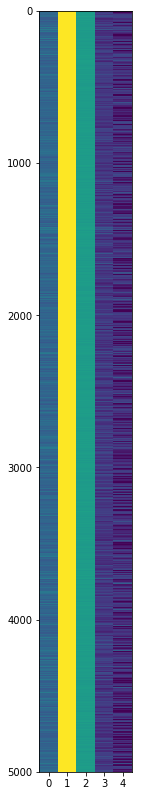

In [26]:
pyvis.heatmap(logP)

In [ ]:
tf.contrib.linalg.LinearOperator.matvec??

In [ ]:
pi = m.post.weight.eval()
print(pi)
maxC = np.argsort(pi)[-1]

In [ ]:

sigsq = m.x_post.components[maxC].precision.eval()
# sigsq
# = 
for mat in [sigsq, np.linalg.inv(K)]:
    print (pyutil.mat2str(np.diag(pyutil.detNorm(mat)),decimal=3))


In [ ]:
m.postComponents[0].event_shape

In [ ]:
edm.MultivariateNormalDiagPlusLowRank??

In [ ]:
# mm = m.components[0]
# mm.batch_shape
# m.x_post.batch_shape
# edm.ParamMixture??

In [ ]:
# edm.ParamMixture??
edm.Mixture??

In [ ]:
m = SunifLRP_VIMAP()
m.init_model(D=4,K=5)

In [ ]:
edm.sphereUniformLRP

In [ ]:
# tf.invert_permutation
# inf.

In [ ]:
np.log1p(np.exp([self.q_rate.eval()[0],self.q_concentration.eval()[0]])[::-1]),data.shape

In [ ]:
plt = pyutil.plt

In [ ]:

qm = edm.sphereUniformLRP(
#     concentration = self.q_concentration,
#     rate = self.q_rate,
#     rate = rate,
    scale_diag =  self.q_scale_diag,
    scale_perturb_factor = self.q_scale_perturb_factor,
    sample_shape = len(data),

)
pyutil.detNorm(qm.precision.eval())

q_mDist = edm.Gamma(
    concentration=self.q_concentration,
#     concentration=self.q_concentration,
    rate=self.q_rate,
#     rate = rate,
    sample_shape=[N])


dist = qm.kernelDist(X1).eval()
# distn = dist/ np.std(dist)
distn = dist
count,xbin,_ = plt.hist(distn,100,normed=1);
# prob
prob = q_mDist.prob(xbin).eval()
plt.plot(xbin,prob)

In [ ]:
# tf.linalgi
# import tensorflow.python
# tf.py
from tensorflow.contrib import linalg
# linalg.LinearOperator.

In [ ]:
mat = qm.forwardMat
# mat = qm.scale.to_dense()
print (pyutil.mat2str(mat.eval(),decimal=3))

In [ ]:
# import pymisca.tensorflow_extra as pytf;reload(pytf)
# edm = pytf.edm

qm = edm.sphereUniformLRP(
#     concentration = self.q_concentration,
#     rate = self.q_rate,
#     rate = rate,
    scale_diag =  self.q_scale_diag,
    scale_perturb_factor = self.q_scale_perturb_factor,
    sample_shape = len(data),

)
Y = qm.sample(5000).eval()

for v in [Y,data]:
    pyvis.qc_2var(v.T[-1],v.T[-3])
    pyvis.qc_2var(v.T[-0],v.T[-3])
# qm.forwardMat

In [ ]:
# import pymisca.tensorflow_extra as pytf;reload(pytf)
# edm = pytf.edm

qm = edm.sphereUniformLRP(
    concentration = self.q_concentration,
    rate = self.q_rate,
#     rate = rate,
    scale_diag =  self.q_scale_diag,
    scale_perturb_factor = self.q_scale_perturb_factor,
    sample_shape = len(data),

)
Y = qm.sample(len(data)).eval()

for i in range(D-1):
    print (i)
    j= i + 1
# for i, j in [[0,1],[1,2]]:
    for vname in ['data','Y']:
        v = eval(vname)
        pyvis.qc_2var(v.T[i],v.T[j])
        plt.suptitle(vname)
        
    plt.show()
#     pyvis.qc_2var(v.T[-0],v.T[-3])
# qm.forwardMat

In [ ]:
# import pymisca.tensorflow_extra as pytf;reload(pytf)
# edm = pytf.edm

qm = edm.sphereUniformLRP(
    concentration = edm.Deterministic(D/2. + 12.),
    rate = edm.Deterministic( 12.,sample_shape=(1,)),
#     concentration = self.q_concentration,
#     rate = self.q_rate,
    scale_diag =  self.q_scale_diag,
    scale_perturb_factor = self.q_scale_perturb_factor,
    sample_shape = len(data),

)
Y = qm.sample(len(data)).eval()

for i in range(D-1):
    print (i)
    j= i + 1
# for i, j in [[0,1],[1,2]]:
    for vname in ['data','Y']:
        v = eval(vname)
        pyvis.qc_2var(v.T[i],v.T[j])
        plt.suptitle(vname)
        
    plt.show()
#     pyvis.qc_2var(v.T[-0],v.T[-3])
# qm.forwardMat

In [ ]:
q_mDist.mean().eval()

In [ ]:
np.log1p(np.exp([self.q_rate.eval()[0],self.q_concentration.eval()[0]])[::-1]),data.shape

In [ ]:
[x.run() for x in inf.reset]
n_iter = 1800
inf.run(n_iter=n_iter)

In [ ]:
            sigsq = self.q_scale_diag.eval()
            sigsq = np.diag(self.q_scale_diag.eval()) + self.q_scale_perturb_factor.eval().T * self.q_scale_perturb_factor.eval()
            sigsq = np.dot(sigsq,sigsq)
# #             print (_, sigsq[0]/sigsq[1],sigsq)
#             n_iter += 200
#             [x.run() for x in inf.reset]
#             inf.run(n_iter=n_iter)
            for mat in [sigsq, np.linalg.inv(K)]:
                print (pyutil.mat2str(np.diag(pyutil.detNorm(mat)),decimal=3))        

In [ ]:
np.diag(qm.precision.eval())

In [ ]:

qm = edm.sphereUniformLRP(
    concentration = self.q_concentration,
    rate = self.q_rate,
    scale_diag =  self.q_scale_diag,
    scale_perturb_factor = self.q_scale_perturb_factor,
    sample_shape = len(data),

)
pyutil.detNorm(qm.precision.eval())

q_mDist = edm.Gamma(
#     concentration=concentration,
    concentration=self.q_concentration,
    rate=self.q_rate,
    sample_shape=[N])


dist = qm.kernelDist(X1).eval()
# distn = dist/ np.std(dist)
distn = dist
count,xbin,_ = plt.hist(distn,100,normed=1);

prob = q_mDist.prob(xbin).eval()
plt.plot(xbin,prob)

In [ ]:
np.log1p(np.exp([self.q_rate.eval()[0],self.q_concentration.eval()[0]])[::-1]),data.shape

In [ ]:
dData = qm.kernelDist(data).eval()
np.diag(qm.precision.eval())


In [ ]:
# ??edm.GammaWithSoftplusConcentrationRate
# ??tf.contrib.distributions.Gamma

In [ ]:
i+=1
name = 'test%d'%i
try:
    tf.get_variable(name+'/test',[1])
    reuse = None
except:
    reuse = True
print (reuse)
# self = pyutil.util_obj()

with tf.variable_scope(name, reuse=reuse):
    concentration = edm.Uniform(sample_shape=(1,))
#     concentration = edm.Deterministic(tf.log( tf.constant([D/2.]) - 1. ))
    rate = edm.Uniform(sample_shape=(1,))
#     mDist = edm.Gamma(
# #         concentration =
#     )
    mDist = edm.GammaWithSoftplusConcentrationRate(
        concentration=concentration,
        rate=rate,
        sample_shape=[N])
#     edm.Deterministic
    self.q_concentration  = edm.PointMass(
        tf.get_variable('q_concentration',shape=[1])
    )
    self.q_rate  = edm.PointMass(
        tf.get_variable('q_rate',shape=[1])
    )

    inf = ed.MAP({
#             scale_diag:self.q_scale_diag,
#               scale_perturb_factor:self.q_scale_perturb_factor,
#             concentration:concentration,
              concentration : self.q_concentration,
              rate: self.q_rate,
#               q_scale
             },{
#             m:data, 
                mDist :dData[:,None]})
#                 mDist: tf.expand_dims(dData,axis=-1)})
inf.run(n_iter=2000)

In [ ]:
np.diag(qm.precision.eval())

In [ ]:
self.q_concentration.eval()

In [ ]:
q_mDist = edm.GammaWithSoftplusConcentrationRate(
    concentration=self.q_concentration,
#     concentration=concentration,
    rate=self.q_rate,
    sample_shape=[N])

dist = dData
# dist = qm.kernelDist(X1).eval()
# distn = dist/ np.std(dist)
distn = dist
count,xbin,_ = plt.hist(distn,100,normed=1);

prob = q_mDist.prob(xbin).eval()
plt.plot(xbin,prob)

In [ ]:
np.log1p(np.exp([self.q_rate.eval()[0],self.q_concentration.eval()[0]])[::-1]),data.shape

In [ ]:
# nn.softplus??
xs= np.linspace(-10,10,100)
# ys = nn.softplus(xs).eval()
ys = np.log(10+np.exp(xs))
plt.plot(xs,ys)

ys = np.log(1+np.exp(xs))
plt.plot(xs,ys)

ys = np.log(0.1+np.exp(xs))
plt.plot(xs,ys)

In [ ]:
data.shape

In [ ]:
nn.softplus(tf.concat([self.q_concentration,self.q_rate],0)).eval() + 1